# Статистический анализ данных 


# Цель исследования

**Анализ данных сервиса аренды самокатов GoFast и проверка гипотез**  

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
1. без подписки
 - абонентская плата отсутствует;
 - стоимость одной минуты поездки — 8 рублей;
 - стоимость старта (начала поездки) — 50 рублей;
2. с подпиской Ultra
 - абонентская плата — 199 рублей в месяц;
 - стоимость одной минуты поездки — 6 рублей;
 - стоимость старта — бесплатно.

**Входные данные:**

Пользователи —  `users_go.csv`

| Столбец | Обозначение |
| ------- | ------- |
| `user_id` | уникальный идентификатор пользователя |
| `name` | имя пользователя |
| `age` | возраст |
| `city` | город |
| `subscription_type` | тип подписки (free, ultra) |

Поездки — `rides_go.csv`

| Столбец | Обозначение |
| ------- | ------- |
| `user_id` | уникальный идентификатор пользователя |
| `distance` | расстояние, которое пользователь проехал в текущей сессии (в метрах) |
| `duration` | продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку» |
| `date` | дата совершения поездки |

Подписки — `subscriptions_go.csv`

| Столбец | Обозначение |
| ------- | ------- |
| `subscription_type` |	тип подписки |
| `minute_price` | стоимость одной минуты поездки по данной подписке |
| `start_ride_price` | стоимость начала поездки |
| `subscription_fee` | стоимость ежемесячного платежа |


Пути к файлам: 

- `/datasets/users_go.csv`
- `/datasets/rides_go.csv`
- `/datasets/subscriptions_go.csv`

### Ход исследования 

1. Обзор данных:
- Импортирование необходимых библиотек.
- Чтение файлов с данными.
- Общий обзор информации.

2. Предобработка данных:

- Приведение типов данных к корректным
- Проверка и обработка дубликатов

3. Исследовательский анализ данных (EDA):

- Анализ частоты встречающихся городов
- Анализ соотношение пользователей с подпиской и без
- Анализ распределения пользователей по возрасту
- Анализ расстояния, которое пользователь преодолел за одну поездку

4. Объединение данных
- Объеденение данных в один датафрейм
- Создание дополнительных датафреймов
- Анализ распределения расстояний поездок по подпискам
- Анализ распределения времени поездок по подпискам

5. Подсчет выручки

- Создание аггрегированного датафрейма
- Добавления столбца с помесячной выручкой

6. Проверка гипотез:

- Тратят ли пользователи с подпиской больше времени на поездки?
- Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
- Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
- Количество обращений в техподдержку значимо снизилось

7. Распределения

- Рассылка промокодов
- Открытие push-уведомлений

8. Формирование вывода

# Обзор данных

## Импортирование библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from scipy import stats as st 
from scipy.stats import binom
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_theme(style="darkgrid")

## Считывание данных из CSV

In [2]:
try:
    data_users = pd.read_csv('/datasets/users_go.csv')
    data_rides = pd.read_csv('/datasets/rides_go.csv')
    data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    data_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
    data_rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
    data_subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

## Ознакомимся с данными каждого датафрейма

### Данные users_go.csv 

In [3]:
# Выведем первые 5 строк
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


### Общая информация users_go.csv

In [4]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Пропущенных значений нет, типы данных указаны корректно

### Данные rides_go.csv

In [5]:
# Выведем первые 5 строк
data_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


### Общая информация rides_go.csv

In [6]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Пропущенных значений нет. В столбце date, на этапе предобработки данных, изменим тип на datetime

### Данные subscriptions_go.csv

In [7]:
# Выведем первые 5 строк
data_subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


### Общая информация subscriptions_go.csv

In [8]:
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Пропущенных значений нет, типы данных указаны корректно

### Промежуточный вывод

Нами была просмотренна общая информация датасетов:
- `users_go` - пользователи
- `rides_go` - поездки
- `subscriptions_go` - подписки

Пропущенных значений не обнаружено, в rides_go в столбце date необходимо изменить тип на datetime. Остальные данные имеют корректный тип

# Предобработка данных

## Приведем тип данных стобца date в rides_go к типу datetime

In [9]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d').dt.date

## Создадим столбец с номером месяца

In [10]:
data_rides['month'] = pd.to_datetime(data_rides['date']).dt.month
data_rides['month'].head()

0    1
1    1
2    4
3    8
4    8
Name: month, dtype: int64

## Проверим наличие дубликатов в датафреймах

### Проверим наличие дубликатов в столбце user_id датафрейма data_users

В data_users нас интересуют дубликаты только в столбце user_id, т.к. они должны быть уникальные. 

In [11]:
data_users[data_users['user_id'].duplicated()]

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


In [12]:
# Выведем количество дубликатов
data_users['user_id'].duplicated().sum()

31

Обнаружен 31 дубликат. Перед тем как решить, что делать с этими записями, необходимо проверить, чем записи отличаются.

### Выявим различия в дубликатах

In [13]:
data_users[data_users.duplicated(subset='user_id', keep=False)].sort_values(by='user_id')

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
...,...,...,...,...,...
1554,1198,Демид,29,Ростов-на-Дону,free
1558,1237,Евгения,23,Тюмень,free
1236,1237,Евгения,23,Тюмень,free
1544,1245,Регина,27,Пятигорск,free


Дублирующие строки идентичны между собой. Возвожно, что пользователь восстанавливал доступ к своему профилю и появлялась новая строка, а не редактировалась старая запись или данные были ранее объеденены неправильно.

### Обработаем дубликаты

In [14]:
# Оставим последнюю запись
data_users = data_users.drop_duplicates(subset='user_id', keep='last').reset_index(drop=True)
# Выведем количество дубликатов
data_users['user_id'].duplicated().sum()

0

Было принято решение оставить последнюю запись.

### Проверим наличие дубликатов в data_rides


In [15]:
data_rides.duplicated().sum()

0

Дубликаты отсутствуют

## Промежуточный вывод

Проведя предобработку данных было выполненно:
- приведен тип данных стобца date в rides_go к типу datetime
- создан новый столбец с номером месяца на основе столбца date
- Проверили наличие дубликатов

В датафрейме `data_users` в столбце `user_id` было обнаружено и обработано 31 дубликат. Нас интересовал именно этот столбец, т.к. в нем должны храниться уникальные значения. Дубликаты могли возникнуть по нескольким причинам:
1. пользователь восстанавливал доступ к своему профилю и появлялась новая строка, а не редактировалась старая запись
2. данные были ранее объеденены неправильно

В датафрейме data_rides дубликаты отсутствуют. В data_subscriptions всего 2 строки, проверять на дубли нецелесообразно.

# Исследовательский анализ данных

## График частоты встречаемости городов

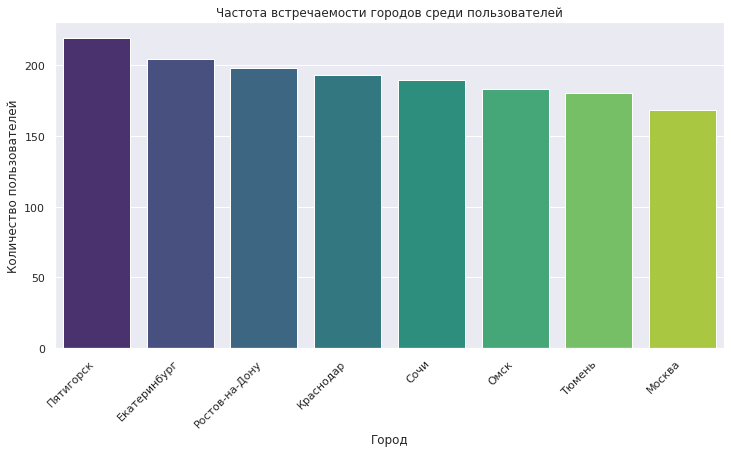

In [16]:
# посчитаем количество пользователей в городах
city_counts = data_users['city'].value_counts()

# настроим график
plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.title('Частота встречаемости городов среди пользователей')

# вывод графика
plt.show()

На первом месте по количеству пользователей находится Пятигорск. Москва - самый крупный город из представленных, но она находится на последнем месте. Низкое количество пользователей можно объяснить высокой конкуренцией с другими сервисами проката.

## График соотношения пользователей с подпиской и без подписки

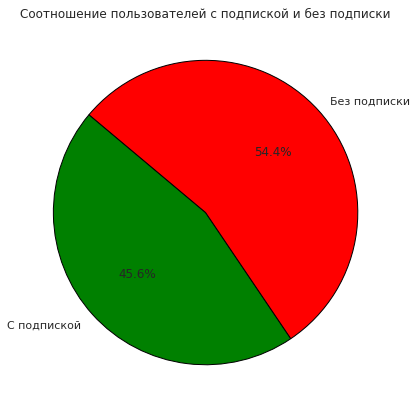

In [17]:
# Отфильтруем пользователей с подпиской и без
subscription = data_users[data_users['subscription_type'] == 'ultra'].shape[0]
without_subscription = data_users[data_users['subscription_type'] == 'free'].shape[0]

# Данные для диаграммы
labels = ['С подпиской', 'Без подписки']
sizes = [subscription, without_subscription]
colors = ['green', 'red']

# Настройки для круговой диаграммы
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# Заголовок
plt.title('Соотношение пользователей с подпиской и без подписки')

# Показываем график
plt.show()

Соотношение пользователей с подпиской и без подписки практически равнораспределенны.

## График распределения пользователей по возрасту

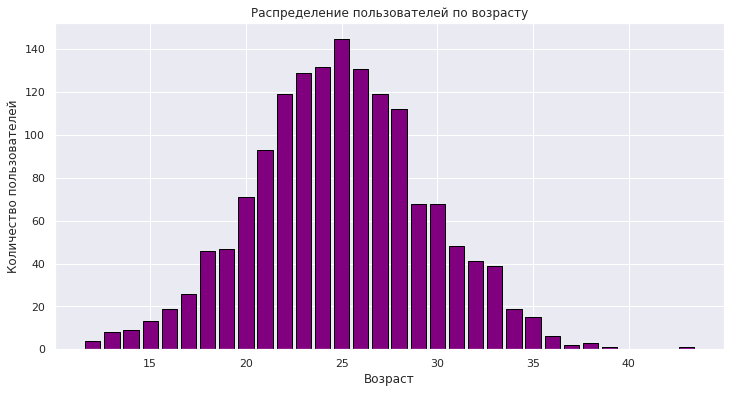

Минимальный возраст пользователей: 12
Максимальный возраст пользователей: 43


In [18]:
# Подсчитаем количество пользователей по годам
ages_count = data_users['age'].value_counts()

# Преобразуем в DataFrame для удобства
ages_df = ages_count.reset_index()
ages_df.columns = ['age', 'count']

# Настройки для графика
plt.figure(figsize=(12, 6))
plt.bar(ages_df['age'], ages_df['count'], color='purple', edgecolor='black')

# Заголовок
plt.title('Распределение пользователей по возрасту')


plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

# Показываем график
plt.show()

print(f"Минимальный возраст пользователей: {ages_df['age'].min()}")
print(f"Максимальный возраст пользователей: {ages_df['age'].max()}")

Возраст пользователей нормально распределен. Минимальный и максимальный возраст составляют 12 и 43, соответственно. Средний возраст, как видно на графике, 25 лет. 

In [19]:
ages_df.describe()

,age,count
count,29.000000,29.000000
mean,26.103448,52.896552
std,8.706914,48.824280
min,12.000000,1.000000
25%,19.000000,9.000000
50%,26.000000,41.000000
75%,33.000000,93.000000
max,43.000000,145.000000


## График расстояния, которое пользователь преодолел за одну поездку

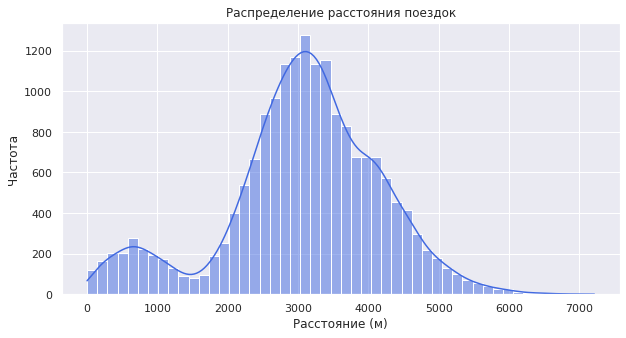

Минимальная поездка: 0.855682925681208 м
Максимальная поездка: 7211.007744598519 м


In [20]:
# Настройка графика
plt.figure(figsize=(10, 5))
sns.histplot(data_rides['distance'], bins=50, kde=True, color='royalblue')
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота')
plt.title('Распределение расстояния поездок')

# Показываем график
plt.show()

print(f"Минимальная поездка: {data_rides['distance'].min()} м")
print(f"Максимальная поездка: {data_rides['distance'].max()} м")

Большинство поездок находятся в интервале от 2 до 5 км, среднее расстояние, которое проезжает пользователь примерно 3 км. Также, есть маленький пик около 500м - короткие поедки.

Минимальное расстояние - 0.8м. Возможно пользователь отказался от поездки сразу после подтверждения или оформил поездку по ошибке. 
Максимальное расстояние - 7211м. Поездки свыше 6000м встречаются редко.

## График продолжительности поездок

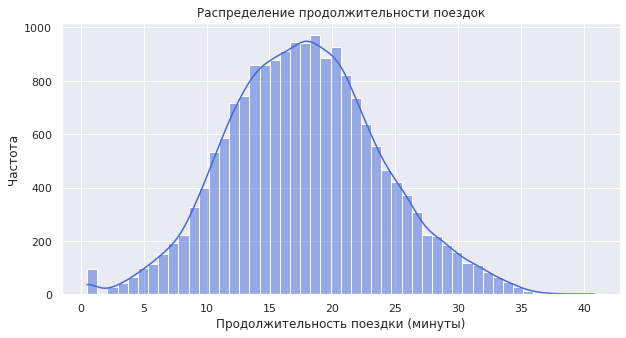

Минимальное время поездки: 0.5 м
Максимальное время поездки: 40.82396261922424 м


In [21]:
# Настройка графика
plt.figure(figsize=(10, 5))
sns.histplot(data_rides['duration'], bins=50, kde=True, color='royalblue')
plt.xlabel('Продолжительность поездки (минуты)')
plt.ylabel('Частота')

# Заголовок
plt.title('Распределение продолжительности поездок')

# Показываем график
plt.show()

print(f"Минимальное время поездки: {data_rides['duration'].min()} м")
print(f"Максимальное время поездки: {data_rides['duration'].max()} м")

Большая часть поездок находится в диапазоне от 10 до 25 минут, есть незначительно количество поездок свыше 35 минут. 

## Промежуточный вывод

Проведя исследовательский анализ данных мы выяснили:
1. Максимальное количество пользователей находится в городе Пятигорск. Москва, хоть и является самым густонаселенным городом в России, занимает последнее место по количеству пользователей. Это может быть обусловленно высокой конкуренцией среди сервисов проката. Южные города: Пятигорск, Ростов-на-Дону, Краснодар, Сочи - занимают Топ-5 по количеству пользователей. Этому могло способствовать наличие большого количества туристов.
2. Количество польователей с подпиской и без практически одинаково.
3. Средний возраст пользователей составляет 25 лет. Большинство людей пользующихся сервисом в возрасте от 20 до 30 лет.
4. Среднее расстояние за одну поездку составляет примерно 3 км. Большая часть поездок находится в диапазоне от 2-х до 5 км. Также есть некоторое количество коротких поездок - до 2 км.
5. Большая часть поездок находится в диапазоне от 10 до 25 минут. 

# Объединение данных

## Объединим data_users, data_rides и data_subscription в один датафрейм

In [22]:
# Объединим data_users и data_rides по полю 'user_id'
data = pd.merge(data_users, data_rides, on='user_id', how='left')

# Объединим data и data_subscription по полю 'subscription_type'
data = pd.merge(data, data_subscriptions, on='subscription_type', how='left')

# Выведем первые 5 строк получившегося датафрейма
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            18068 non-null  int64  
 1   name               18068 non-null  object 
 2   age                18068 non-null  int64  
 3   city               18068 non-null  object 
 4   subscription_type  18068 non-null  object 
 5   distance           18068 non-null  float64
 6   duration           18068 non-null  float64
 7   date               18068 non-null  object 
 8   month              18068 non-null  int64  
 9   minute_price       18068 non-null  int64  
 10  start_ride_price   18068 non-null  int64  
 11  subscription_fee   18068 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.8+ MB


Данные объединены корректно

## Создадим датафреймы пользователей с подпиской и без

In [24]:
# Пользователи с подпиской
data_subs = data[data['subscription_type'] == 'ultra']

# Пользователи без подписки
data_no_subs = data[data['subscription_type'] == 'free']

# Выведем первые 5 строк обоих датафреймов
display(data_subs.head())
display(data.info())
display(data_no_subs.head())
display(data.info())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            18068 non-null  int64  
 1   name               18068 non-null  object 
 2   age                18068 non-null  int64  
 3   city               18068 non-null  object 
 4   subscription_type  18068 non-null  object 
 5   distance           18068 non-null  float64
 6   duration           18068 non-null  float64
 7   date               18068 non-null  object 
 8   month              18068 non-null  int64  
 9   minute_price       18068 non-null  int64  
 10  start_ride_price   18068 non-null  int64  
 11  subscription_fee   18068 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.8+ MB


None

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6328,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6329,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6330,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6331,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6332,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            18068 non-null  int64  
 1   name               18068 non-null  object 
 2   age                18068 non-null  int64  
 3   city               18068 non-null  object 
 4   subscription_type  18068 non-null  object 
 5   distance           18068 non-null  float64
 6   duration           18068 non-null  float64
 7   date               18068 non-null  object 
 8   month              18068 non-null  int64  
 9   minute_price       18068 non-null  int64  
 10  start_ride_price   18068 non-null  int64  
 11  subscription_fee   18068 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.8+ MB


None

## График распределения расстояний поездок по подпискам

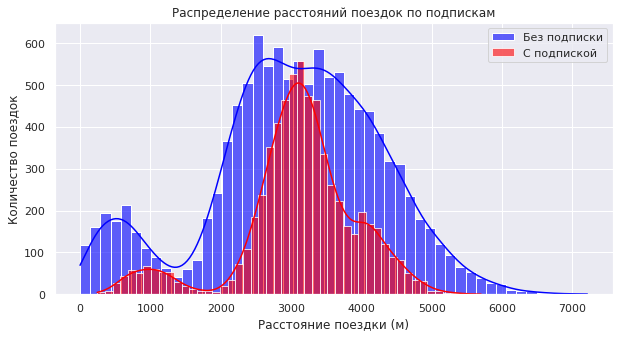

In [25]:
# Настройки графиков
plt.figure(figsize=(10, 5))
sns.histplot(data[data['subscription_type'] == 'free']['distance'], bins=50, kde=True, label='Без подписки', color='blue', alpha=0.6)
sns.histplot(data[data['subscription_type'] == 'ultra']['distance'], bins=50, kde=True, label='С подпиской', color='red', alpha=0.6)
plt.xlabel('Расстояние поездки (м)')
plt.ylabel('Количество поездок')

# Заголовок
plt.title('Распределение расстояний поездок по подпискам')

# Легенда
plt.legend()

# Показываем график
plt.show()

Пользователи с подпиской в основном преодолнвают расстояния в диапазоне от 2-х до 5 км. Для пользователей без подписки диапазон шире и количество поездок значительно больше. Также заметно, что ими выполняется больше коротких поездок (до 1.5 км) и поездки свыше 5 км выполняются преимущественно эти пользователи. 

## График распределения времени поездок по подпискам

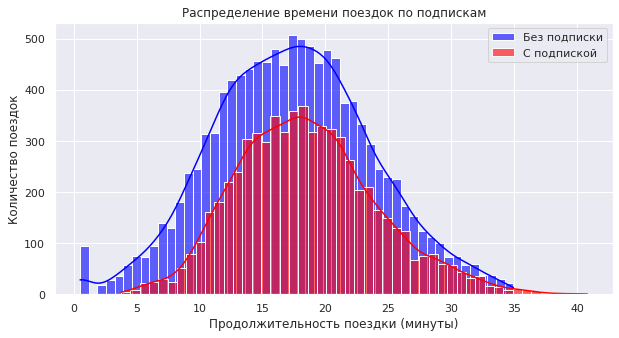

In [26]:
# Настройки для графиков
plt.figure(figsize=(10, 5))
sns.histplot(data[data['subscription_type'] == 'free']['duration'], bins=50, kde=True, label='Без подписки', color='blue', alpha=0.6)
sns.histplot(data[data['subscription_type'] == 'ultra']['duration'], bins=50, kde=True, label='С подпиской', color='red', alpha=0.6)
plt.xlabel('Продолжительность поездки (минуты)')
plt.ylabel('Количество поездок')

# Заголовок
plt.title('Распределение времени поездок по подпискам')

# Легенда
plt.legend()

# Показываем график
plt.show()

Пользователи без подписки совершают большее количество поездок. Пользователи с подпиской реже совершают поездки продолжительностью менее 10 минут. Подписка снижает стоимость длительных поездок.

## Промежуточный вывод

На данном этапе мы объединили датафреймы data_users, data_rides и data_subscription в один и создали 2 дополнительных.

`data_subs` - Пользователи с подпиской

`data_no_subs` - Пользователи без подписки

Изучив графики распределения времени и расстояния для каждой категории пользователей мы выяснили:
- Пользователи без подписки чаще совершают короткие поездки в отличие от пользователей с подпиской
- Пользователи без подписки чаще совершают длинные поездки (свыше 5 км)
- Пользователи с подпиской в основном преодолнвают расстояния в диапазоне от 2-х до 5 км (Возможно, что у них есть заранее запланированный маршрут и они чаще используют сервис для того, чтобы добраться из дома до работы и наоборот)
- Пользователи с подпиской реже совершают поездки продолжительностью менее 10 минут

# Подсчёт выручки

## Создадим датафрейм с агрегированными данными о поездках для каждого пользователя за каждый месяц.

In [27]:
# Округляем продолжительность поездки вверх
data['duration'] = np.ceil(data['duration'])

# Группируем данные по пользователям и месяцу
aggregated_data = data.groupby(['user_id', 'month'], as_index=False).agg(
    total_distance=('distance', 'sum'),     
    total_rides=('user_id', 'count'),       
    total_duration=('duration', 'sum')  
)

# Выводим первые 5 строк
aggregated_data.head()

,user_id,month,total_distance,total_rides,total_duration
0,1,1,7027.511294,2,42.0
1,1,4,754.159807,1,7.0
2,1,8,6723.470560,2,46.0
3,1,10,5809.911100,2,32.0
4,1,11,7003.499363,3,56.0


## Добавим столбец с помесячной выручкой, которую принёс каждый пользователь.

In [28]:
# Добавляем информацию о подписке пользователей
aggregated_data = aggregated_data.merge(data[['user_id', 'subscription_type']], on='user_id', how='left').drop_duplicates()

# Добавляем данные о тарифах
aggregated_data = aggregated_data.merge(data_subscriptions, on='subscription_type', how='left')

# Рассчитываем выручку 
aggregated_data['revenue'] = (
    aggregated_data['start_ride_price'] * aggregated_data['total_rides'] +  
    aggregated_data['minute_price'] * aggregated_data['total_duration'] +  
    aggregated_data['subscription_fee']  
)

# Оставляем только нужные столбцы
aggregated_data = aggregated_data[['user_id', 'month', 'total_distance', 'total_rides', 'total_duration','subscription_type', 'revenue']]

# Выводим первые 5 строк
aggregated_data.head()

,user_id,month,total_distance,total_rides,total_duration,subscription_type,revenue
0,1,1,7027.511294,2,42.0,ultra,451.0
1,1,4,754.159807,1,7.0,ultra,241.0
2,1,8,6723.470560,2,46.0,ultra,475.0
3,1,10,5809.911100,2,32.0,ultra,391.0
4,1,11,7003.499363,3,56.0,ultra,535.0


## Промежуточный вывод

На данном этапе мы создали датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными и добавили столбец с помесячной выручкой, которую принёс каждый пользователь.

# Проверка гипотез

## Гипотеза 1. H0 - пользователи с подпиской и без тратят одинаковое время на поездки. H1 - пользователи с подпиской тратят больше времени на поездки

In [29]:
# Собираем выборки 
ultra = data_subs['duration']
free = data_no_subs['duration']

print(f'Среднее время поездки пользователей с подпиской: {np.mean(ultra)}')
print(f'Среднее время поездки пользователей без подписки: {np.mean(free)}')

# Указываем уровень значимости
alpha = 0.05

# Проводим тест
results = st.ttest_ind(ultra, free, alternative='greater')

print(f'p-значение: {results.pvalue}')

# Выводим результат
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее время поездки пользователей с подпиской: 18.54198516280583
Среднее время поездки пользователей без подписки: 17.39090929866399
p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Проверив одностороннюю гипотезу: о том, что среднее время поездки пользователей с подпиской выше среднего времени поездки пользователей без подписки мы отвергли нулевую гипотезу при уровне статистической значимости,
равном 5%. 

## Гипотеза 2. H0 - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 м. H1 - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку более 3130 м.

In [30]:
# Собираем выборку
ultra = data_subs['distance']

# Вывод среднего расстояния
print(f'Среднее расстояние пользователей с подпиской: {np.mean(ultra)}')

# Оптимальное значение
value = 3130

# Ууказываем уровень статистической значимости
alpha = 0.05

# Проводим тест 
results = st.ttest_1samp(ultra, value, alternative='greater')

# Вывод р-значения
print(f'p-значение: {results.pvalue}')

# Выводим результат
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее расстояние пользователей с подпиской: 3115.4453880370247
p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Среднее ГС равно 3115, что меньше предположенного в нулевой гипотезе значения, но разница не является статистически значимой на уровне 5%. Это значит, что нет достаточных оснований утверждать, что пользователи с подпиской проезжают меньше 3130 м за поездку.

## Гипотеза 3. Н0 - помесячная выручка от пользователей с подпиской и без по месяцам равна. Н1 - помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

In [31]:
# Собираем выборки
ultra = aggregated_data[aggregated_data['subscription_type'] == 'ultra']['revenue']
free = aggregated_data[aggregated_data['subscription_type'] == 'free']['revenue']

# Вывод средней выручки
print(f'Средняя выручка от пользователей с подпиской: {np.mean(ultra)}')
print(f'Средняя выручка от пользователей без подписки: {np.mean(free)}')

# Ууказываем уровень статистической значимости
alpha = 0.05

# Проводим тест
results = st.ttest_ind(ultra, free, alternative='greater')

print(f'p-значение: {results.pvalue}')

# Выводим результат
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средняя выручка от пользователей с подпиской: 362.7921906022502
Средняя выручка от пользователей без подписки: 328.6413651073845
p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Проверив одностороннюю гипотезу: о том, что средняя выручка от пользователей с подпиской выше средней выручки от пользователей без подписки мы отвергли нулевую гипотезу при уровне статистической значимости, равном 5%.

## Гипотеза 4. Н0 - Количество обращений до и после обновления не отличается. Н1 - Количество обращений после обновления снизилось по сравнению с количеством обращений до обновления.

Для проверки этой гипотезы нам понадобится t-тест для зависимых выборок. Данные до и после обновления для каждого пользователя, т.е. пары значений, которые связаны между собой (например, количество обращений до обновления и после для одного и того же пользователя). Это означает, что мы работаем с зависимыми выборками.

## Промежуточный вывод.

На данном этапе мы проверили гипотезы:

- Тратят ли пользователи с подпиской больше времени на поездки?
- Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
- Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
- Количество обращений в техподдержку значимо снизилось

Проверив одностороннюю гипотезу: о том, что среднее время поездки пользователей с подпиской выше среднего времени поездки пользователей без подписки мы отвергли нулевую гипотезу при уровне статистической значимости, равном 5%.

Среднее ГС равно 3115, что меньше предположенного в нулевой гипотезе значения, но разница не является статистически значимой на уровне 5%. Это значит, что нет достаточных оснований утверждать, что пользователи с подпиской проезжают меньше 3130 м за поездку.

Проверив одностороннюю гипотезу: о том, что средняя выручка от пользователей с подпиской выше средней выручки от пользователей без подписки мы отвергли нулевую гипотезу при уровне статистической значимости, равном 5%.

Для проверки этой гипотезы (Количество обращений в техподдержку значимо снизилось) нам понадобится t-тест для зависимых выборок. Данные до и после обновления для каждого пользователя, т.е. пары значений, которые связаны между собой (например, количество обращений до обновления и после для одного и того же пользователя). Это означает, что мы работаем с зависимыми выборками.

# Распределения

## Какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %?

Нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. После бесплатного пробного периода подписку продлевают 10 % пользователей.

Минимальное количество промокодов, чтобы вероятность не выполнить план была ≤ 5%: 1161


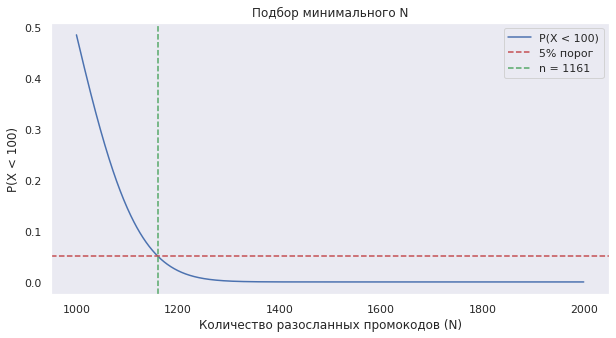

In [32]:
# Вероятность продления подписки
p = 0.1

# Минимальное количество продливших подписку
target = 100

# Подбираем минимальное N
N = np.arange(1000, 2000, 1)  
probabilities = [st.binom.cdf(target - 1, n, p) for n in N]  

# Находим минимальное n
n = N[np.where(np.array(probabilities) <= 0.05)[0][0]]

print(f'Минимальное количество промокодов, чтобы вероятность не выполнить план была ≤ 5%: {n}')

# Настройки графика
plt.figure(figsize=(10, 5))
plt.plot(N, probabilities, label="P(X < 100)")
plt.axhline(0.05, color='r', linestyle='--', label="5% порог")
plt.axvline(n, color='g', linestyle='--', label=f"n = {n}")
plt.xlabel("Количество разосланных промокодов (N)")
plt.ylabel("P(X < 100)")
plt.title("Подбор минимального N")
plt.legend()
plt.grid()

# Показываем график
plt.show()

Используя биномиальное распределение, которое описывает указанную ситуацию, мы выяснили, что минимальное количество промокодов, которые нужно разослать, чтобы вероятность не выполнить план была меньше или равна 5%, составляет 1161.

## С помощью аппроксимации построим примерный график распределения и оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений.

P(X ≤ 399500) = 0.1537


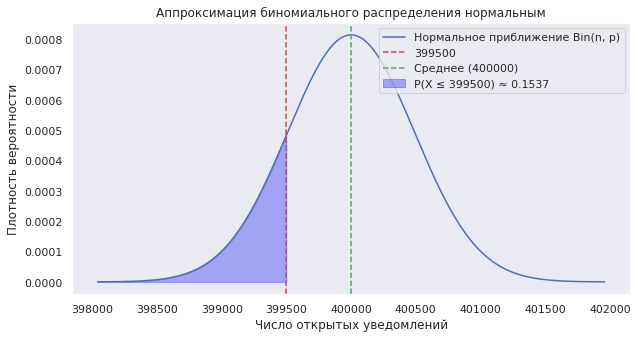

In [33]:
# Количество уведомлений
n = 1000000  

# Вероятность открытия
p = 0.4  

# Мат. ожидание
mu = n * p  

# Стандартное отклонение
sigma = np.sqrt(n * p * (1 - p))  

# Проверяемое значение
x_value = 399500

# Вычисляем вероятность
prob = st.norm.cdf(x_value, loc=mu, scale=sigma)

print(f'P(X ≤ 399500) = {prob:.4f}')

# Визуализация нормального распределения
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
y = st.norm.pdf(x, loc=mu, scale=sigma)

# Настройка графика
plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Нормальное приближение Bin(n, p)", color='b')
plt.fill_between(x, y, where=(x <= x_value), color='blue', alpha=0.3, label=f"P(X ≤ 399500) ≈ {prob:.4f}")
plt.axvline(x_value, color='r', linestyle="--", label="399500")
plt.axvline(mu, color='g', linestyle="--", label="Среднее (400000)")
plt.xlabel("Число открытых уведомлений")
plt.ylabel("Плотность вероятности")
plt.title("Аппроксимация биномиального распределения нормальным")
plt.legend()
plt.grid()

# Показываем график
plt.show()

С помощью нормальной аппроксимации биномиального распределения мы выяснили, что вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составляет, примерно, 15%.

## Промежуточный вывод

На данном этапе мы рассчитали, что для выполнения маркетингового плана (чтобы минимум 100 клиентов продлили подписку) с вероятностью не менее 95% необходимо разослать 1161 промокод. При рассылке 1 млн уведомлений, вероятность того, что их откроют не более 399 500 пользователей, составляет примерно 15%.

# Общий вывод

1. Предобработка данных

Мы проанализировали и обработали данные трех датасетов:

 • users_go (пользователи),
 • rides_go (поездки),
 • subscriptions_go (подписки).

Основные действия:

 • Преобразовали столбец date в rides_go в формат datetime.
 • Добавили новый столбец с номером месяца.
 • Проверили дубликаты: в data_users удалили 31 дубликат в user_id, а в data_rides и data_subscriptions дубликаты отсутствовали.

2. Исследовательский анализ данных

 • География пользователей:
 • Пятигорск — лидер по количеству пользователей.
 • Москва занимает последнее место среди городов, вероятно из-за высокой конкуренции.
 • Южные города (Ростов-на-Дону, Краснодар, Сочи) имеют высокий спрос, что может объясняться туристическим потоком.
 • Профиль пользователей:
 • Средний возраст — 25 лет.
 • Большинство пользователей — от 20 до 30 лет.
 • Количество пользователей с подпиской и без подписки практически одинаково.
 • Анализ поездок:
 • Среднее расстояние поездки — примерно 3 км.
 • Большая часть поездок — от 2 до 5 км.
 • Средняя продолжительность поездки — 10–25 минут.

3. Анализ поведения пользователей с подпиской и без

 • Пользователи без подписки чаще совершают короткие поездки.
 • Пользователи с подпиской чаще преодолевают фиксированные расстояния (2–5 км), вероятно, для регулярных поездок (например, дом-работа).
 • Долгие поездки (более 5 км) чаще совершают пользователи без подписки.
 • Пользователи с подпиской реже совершают поездки менее 10 минут.

4. Проверка гипотез

✅ Пользователи с подпиской проводят в поездках больше времени - подтверждено (нулевая гипотеза отвергнута).

✅ Среднее расстояние поездки пользователей с подпиской > 3130 м - не подтверждено (разница незначима).

✅ Выручка от пользователей с подпиской выше - подтверждено.

✅ Количество обращений в техподдержку снизилось - требуется t-тест для зависимых выборок.

5. Маркетинговые рекомендации

 • Для выполнения плана по продлению подписки необходимо разослать 1161 промокод (чтобы минимум 100 клиентов продлили подписку с вероятностью ≥95%).
 • 15% вероятность, что push-уведомления откроют ≤399 500 пользователей (из 1 млн).

Выводы и рекомендации

 • Подписка увеличивает среднее время поездки - выгодно для компании.
 • Подписчики приносят больше выручки в среднем.
 • Есть смысл предлагать подписку пользователям, которые ездят регулярно (например, на основе анализа их маршрутов).
 • Маркетинговая акция с бесплатным месяцем подписки требует рассылки 1161 промокода.
 • Push-уведомления открывают примерно 40% пользователей.

В целом, подписочная модель выгодна для компании, но требует дополнительных маркетинговых усилий для повышения вовлеченности пользователей.